In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import quad
from astropy import units as u
from astropy import constants as C
from scipy import special

Now define the integrand, eq.7

In [ ]:
def integrando(x,t,m,D,l,b,eps):
  v_0 = 220* u.km/u.s  #Velocidad en Km/s
  rho = 1.39*((u.GeV)/(C.c**2))*(1/u.cm**3)
  R_sol = 8.5*u.kpc
  r_s = 4.38*u.kpc

  r_1 = R_sol/r_s # aparecen en r
  r_2 = D*u.kpc/r_s   # aparecen en r

  rE_squ = 16*C.G*x*(1-x)*(m*C.M_sun)*(D*u.kpc)/(C.c**2) #R_E al cuadrado
  
  v_e = rE_squ/((v_0*(u.day*t))**2)   #v_e^2
  exp = np.exp(-v_e.decompose()) 

  f_1 = v_e**2    #v_e^4
  f_2 = D*u.kpc/(m*C.M_sun)   

  rsqu_rs = r_1**2 + (x*r_2)**2 - 2*x*r_1*r_2*np.cos(b)*np.cos(l) #(r/r_s)^2
  rho_dm = rho/(1+rsqu_rs)
  eps = 0.2

  integrand = 2*eps*(v_0**2)*f_1*f_2*exp*rho_dm
  return (integrand*2500*u.day*u.day*t).decompose()  #Lo multiplico por la unidad s^2 para que quede adimensional y pueda integrarlo

A few parameters more


In [ ]:
D_s = 50   #distance to LMC en kpc
l = 280.46*np.pi/180 #angulo l de coordenadas galacticas
b = -32.89*np.pi/180 #angulo b de coordenadas galacticas
t_e = np.logspace(-1, 3, 30) #tiempo de duracion en días
eps = 0.2 #eficiencia para EROS considerada constante
m = np.array([10, 1e-2, 1e-5]) #masas usadas en M_sun

this part do the integral



In [ ]:
I_k=np.zeros([len(t_e),len(m)])
for j in range(0,len(m)):
  for i in range(len(t_e)):
    I_j = integrate.fixed_quad(lambda x: integrando(x, t_e[i],m[j] , D_s, l, b, eps), 0, 1, n=10)
    I_k[i,j] = I_j[0]

plot the fig.4.a only for EROS-2

Text(0, 0.5, '$\\frac{d\\Gamma}{dt_E}$(star/day/day)')

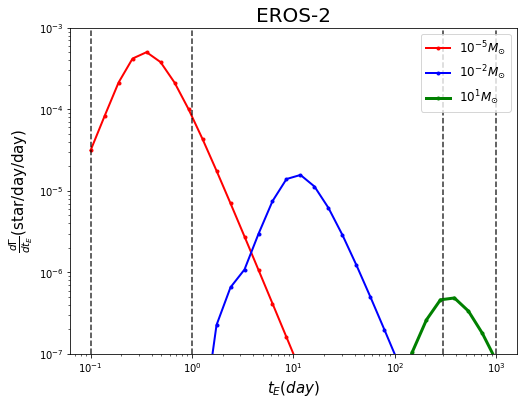

In [ ]:
#@title plot EROS-2
plt.figure(0,figsize=(8,6))
plt.title('EROS-2',fontsize=20)
plt.ylim(1e-7 , 1e-3)
# plt.xlim(1,1000)

plt.loglog(t_e, I_k[:,2], '.-', color='red',lw=2,label =r'$10^{-5} M_{\odot}$')
plt.loglog(t_e, I_k[:,1], '.-', color='blue',lw=2, label =r'$10^{-2} M_{\odot}$')
plt.loglog(t_e, I_k[:,0], '.-', color='green',lw=3,label =r'$10^{1} M_{\odot}$')

plt.axvline(x=1,linestyle='--',color='black',alpha=0.8)
plt.axvline(x=0.1,linestyle='--',color='black',alpha=0.8)
plt.axvline(x=300,linestyle='--',color='black',alpha=0.8)
plt.axvline(x=1000,linestyle='--',color='black',alpha=0.8)

plt.legend(loc=1,fontsize=12)
plt.xlabel(r'$t_E(day)$',fontsize=15)
plt.ylabel(r'$\frac{d\Gamma}{dt_E}$(star/day/day)',fontsize=15)


busco graficos de exclusion